In [18]:
# Import Python Mobules
import os, argparse, json
import numpy as np
from sys import argv
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt


# Reduce warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [19]:
# Command line arguments

buildEnv = False

parser = argparse.ArgumentParser()
parser.add_argument( '-runName', )
parser.add_argument( '-modelLoc', )
parser.add_argument( "-tid", default = '587722984435351614',  type=str )
parser.add_argument( "-start",   default = 0,    type=int, )
parser.add_argument( "-stop",    default = 3,  type=int, )
parser.add_argument( "-verbose", default = 0,    type=int, )
parser.add_argument( "-num_epochs",    default=2,   type=int )
parser.add_argument( "-learning_rate", default=0.0008, type=float )
parser.add_argument( "-batch_size",    default=16,  type=int )
parser.add_argument( "-save_model",    default=True,  type=bool )
parser.add_argument( "-data_gen",      default='True',  type=str )

# Core Model types
parser.add_argument( "-model", default = 'resnet', )
parser.add_argument( "-pool",   default = 'None', type=str )
parser.add_argument( "-weights", default = 'imagenet',  type=str )

# Final layers
parser.add_argument( "-f_depth", default = 3,  type=int )
parser.add_argument( "-f_width", default = 32, type=int )
parser.add_argument( "-f_activation", default = 'tanh', type=str )
parser.add_argument( "-output_activation", default = None )

print("Args: Initialized")

Args: Initialized


In [20]:
def cmdBuilder( args, printAll = True ):
    
    # Standard variables
    cmdLine  = './target_score.py'
    cmdLine += ' -learning_rate %.5f' % args.learning_rate
    cmdLine += ' -f_depth %d' % args.f_depth
    cmdLine += ' -f_width 32'
    cmdLine += ' -f_activation relu'
    cmdLine += ' -output_activation sigmoid'
    cmdLine += ' -model efficientNetB0'
    cmdLine += ' -data_gen %s' % str(args.data_gen)
    
    # Change some variables for test execution
    testLine = cmdLine
    testLine += ' -runName test-%s' % args.runName
    testLine += ' -start %d' % args.start
    testLine += ' -stop %d' % (args.start + 1 )
    testLine += ' -num_epochs 2'
    testLine += ' -verbose 1'
    
    if printAll:
        print( "###  TEST  ###")
        print( testLine )
        
    # Print actual executable
    cmdLine += ' -runName %s' % args.runName
    cmdLine += ' -start %d' % args.start
    cmdLine += ' -stop %d' % args.stop
    cmdLine += ' -num_epochs %d' % args.num_epochs
        
    if printAll:
        print("\n###  REAL  ###")
        print( cmdLine )
    
    return cmdLine
    
    
    
cmdStr = ''
cmdStr += ' -runName test-target-builder-22-1630'
cmdStr += ' -start 1'
cmdStr += ' -stop 100'
cmdStr += ' -num_epochs 100'
cmdStr += ' -learning_rate 0.0001'
cmdStr += ' -verbose 1'
cmdStr += ' -save_model False'
                                    
cmdStr += ' -model efficientNetB0'
cmdStr += ' -weights imagenet'
cmdStr += ' -pool max'
                                    
cmdStr += ' -f_depth 6'
cmdStr += ' -f_width 32'
cmdStr += ' -f_activation relu'
cmdStr += ' -output_activation sigmoid'
                                    
args = parser.parse_args(cmdStr.split())

tmp = cmdBuilder( args )

###  TEST  ###
./target_score.py -learning_rate 0.00010 -f_depth 6 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen True -runName test-test-target-builder-22-1630 -start 1 -stop 2 -num_epochs 2 -verbose 1

###  REAL  ###
./target_score.py -learning_rate 0.00010 -f_depth 6 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen True -runName test-target-builder-22-1630 -start 1 -stop 100 -num_epochs 100


# To Rotate or Not to Rotate

In [21]:
cmdStr = ''
cmdStr += ' -stop 500'
cmdStr += ' -num_epochs 500'
cmdStr += ' -learning_rate 0.00005'
cmdStr += ' -verbose 1'
cmdStr += ' -save_model False'
                                    
cmdStr += ' -model efficientNetB0'
cmdStr += ' -weights imagenet'
cmdStr += ' -pool None'
                        
cmdStr += ' -f_width 32'
cmdStr += ' -f_depth 10'
cmdStr += ' -f_activation relu'
cmdStr += ' -output_activation sigmoid'

args = parser.parse_args(cmdStr.split())

args.runName = 'run-6-1700-data-asis-test'
args.data_gen = False

cmdLine = cmdBuilder( args, True )

runLoc =  'runs/%s.sh' % args.runName
runFile = open( runLoc, 'w' )
runFile.write( cmdLine + '\n' )


for i in range( 0, 5 ):
    print( i )

    args.runName = 'run-6-1700-data-asis-%d' % ( i )
    args.data_gen = False

    cmdLine = cmdBuilder( args, False )

    print( cmdLine )

    runLoc =  'runs/%s.sh' % args.runName
    runFile = open( runLoc, 'w' )
    runFile.write( cmdLine + '\n' )

    args.runName = 'run-6-1700-data-gen-%d' % ( i )
    args.data_gen = True

    cmdLine = cmdBuilder( args, False )

    print( cmdLine )

    runLoc =  'runs/%s.sh' % args.runName
    runFile = open( runLoc, 'w' )
    runFile.write( cmdLine + '\n' )

###  TEST  ###
./target_score.py -learning_rate 0.00005 -f_depth 10 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen False -runName test-run-6-1700-data-asis-test -start 0 -stop 1 -num_epochs 2 -verbose 1

###  REAL  ###
./target_score.py -learning_rate 0.00005 -f_depth 10 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen False -runName run-6-1700-data-asis-test -start 0 -stop 500 -num_epochs 500
0
./target_score.py -learning_rate 0.00005 -f_depth 10 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen False -runName run-6-1700-data-asis-0 -start 0 -stop 500 -num_epochs 500
./target_score.py -learning_rate 0.00005 -f_depth 10 -f_width 32 -f_activation relu -output_activation sigmoid -model efficientNetB0 -data_gen True -runName run-6-1700-data-gen-0 -start 0 -stop 500 -num_epochs 500
1
./target_score.py -learning_rate 0.00005 -f_depth 10 -f_width 32 -f_activation relu -

In [22]:
# Gather results with lr

asisResults = []
genResults = []
results = { 'asis': { 'loss':[], 'val_loss':[] }, 'gen':{ 'loss':[], 'val_loss':[] } }


for i in range( 0, 5 ):

    fileLoc = 'results/run-6-1700-data-gen-%d.txt' % ( i )
    if not os.path.exists( fileLoc ): continue

    with open( fileLoc ) as rFile:
        for l in rFile:
            l.strip()

            if 'Training accuracy' in l:
                results['gen']['loss'].append( l.split(':')[1].split() )

            elif 'Test' in l:
                results['gen']['val_loss'].append( l.split(':')[1].split() )

    fileLoc = 'results/run-6-1700-data-asis-%d.txt' % ( i )
    if not os.path.exists( fileLoc ): continue
    with open( fileLoc ) as rFile:
        for l in rFile:
            l.strip()

            if 'Training accuracy' in l:
                results['asis']['loss'].append( l.split(':')[1].split() )

            elif 'Test' in l:
                results['asis']['val_loss'].append( l.split(':')[1].split() )
      
    # End collecting data
    
results['gen']['loss'] = np.array(results['gen']['loss']).astype(float)
results['gen']['val_loss'] = np.array(results['gen']['val_loss']).astype(float)
results['asis']['loss'] = np.array(results['asis']['loss']).astype(float)
results['asis']['val_loss'] = np.array(results['asis']['val_loss']).astype(float)

print( 'Gen Loss: ', results['gen']['loss'].shape )
print( 'Gen Val: ', results['gen']['val_loss'].shape )
print( 'Asis Loss: ', results['asis']['loss'].shape )
print( 'Asis Val: ', results['asis']['val_loss'].shape )
    
        


Gen Loss:  (4, 500)
Gen Val:  (4, 500)
Asis Loss:  (4, 500)
Asis Val:  (4, 500)


(4, 500)
(500,) (500,)
(4, 500)
(500,) (500,)
(4, 500)
(500,) (500,)
(4, 500)
(500,) (500,)


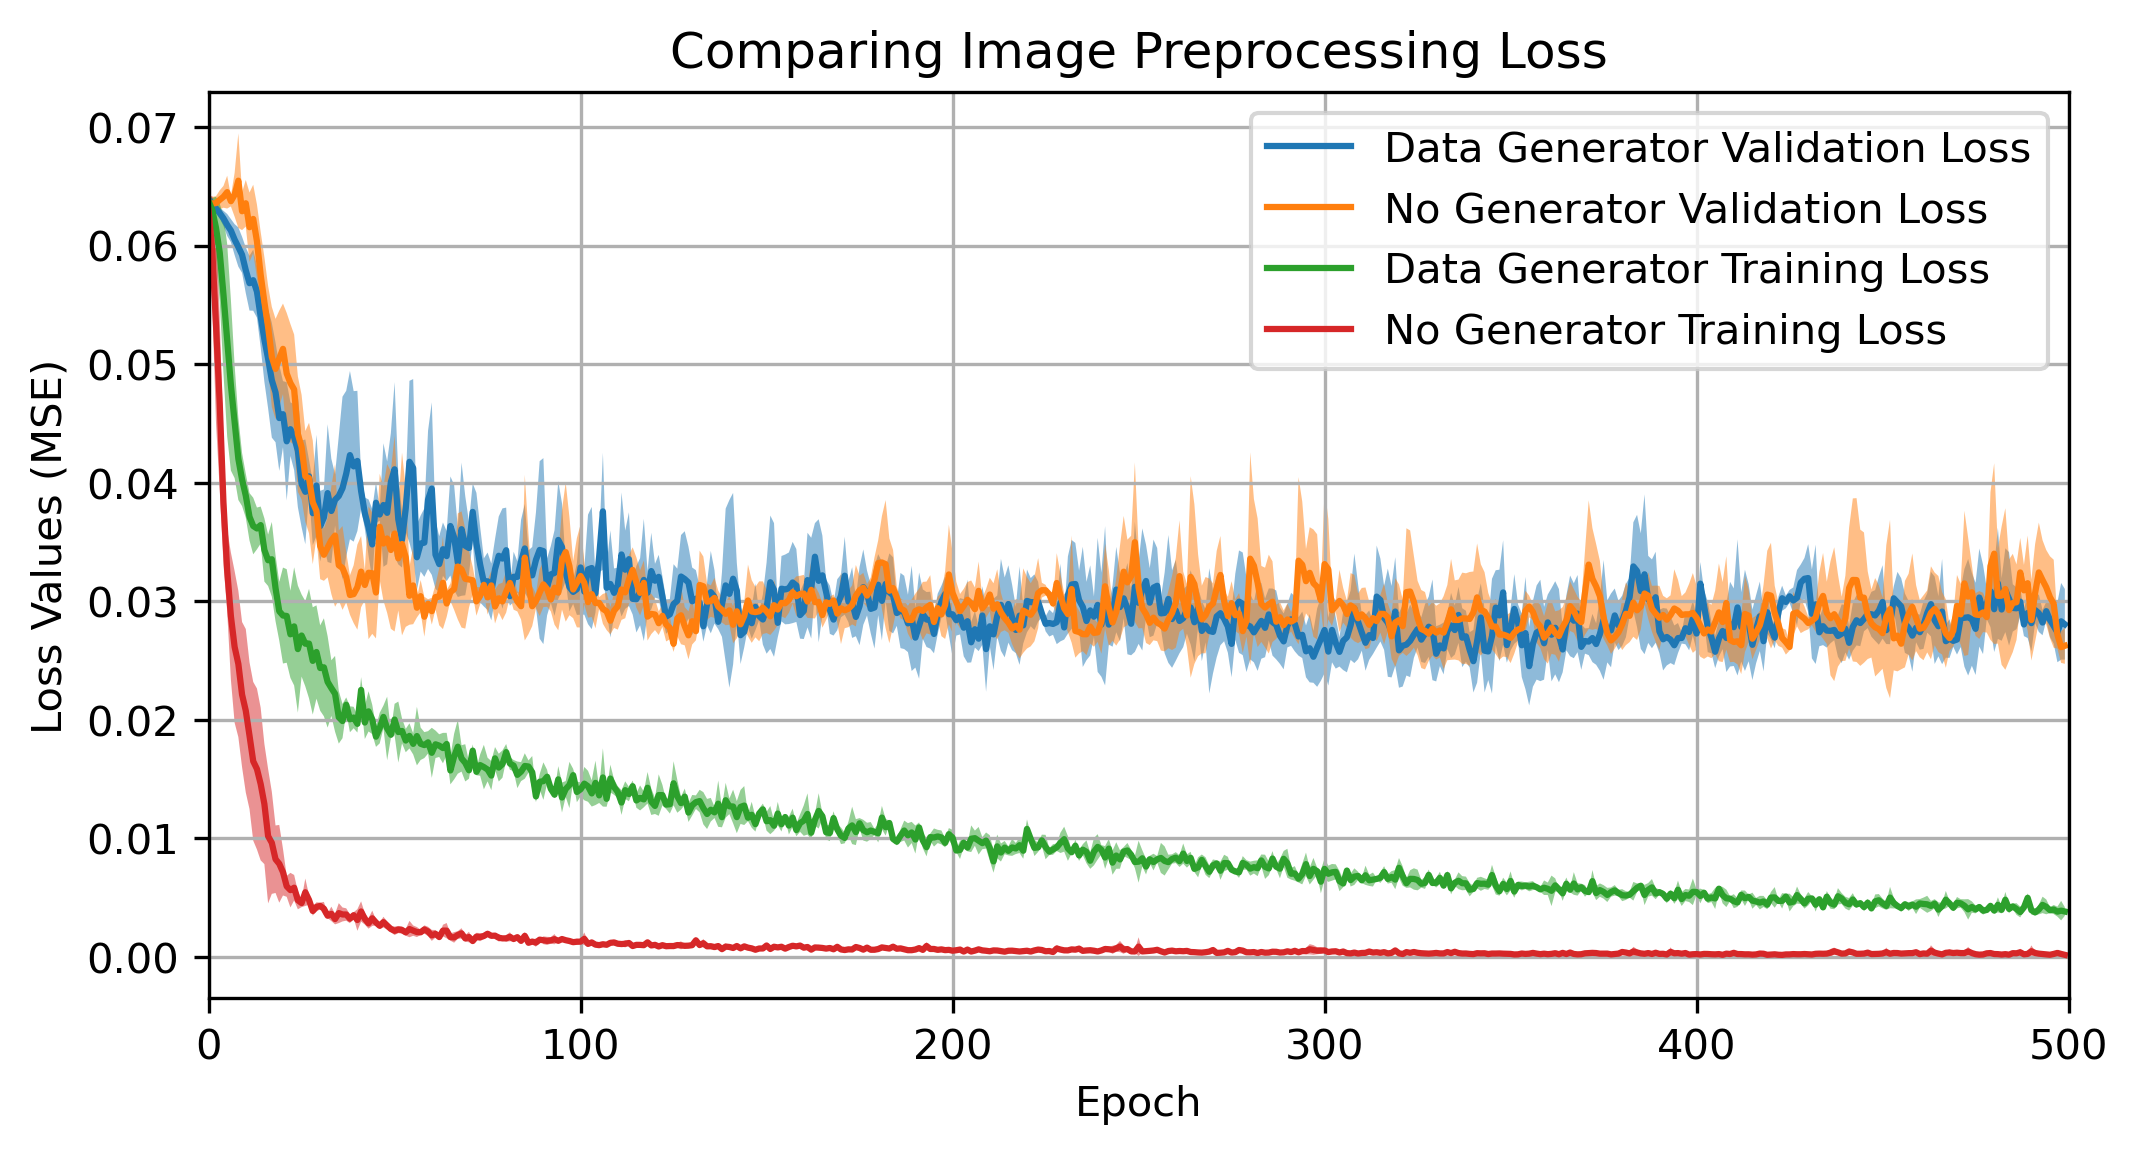

In [23]:
def graph_data_gen_results( results ):
    
    plt.figure(figsize=(8, 4), dpi=300)
    
    # Plot results from each optimizer
    
    genData = results['gen']['val_loss']
    
    def addPlot( data, l=None ):
        print( data.shape )

        x = np.arange( 0, data.shape[1] )
        mean = np.mean( data, 0 )
        std = np.std( data, 0 )

        print( x.shape, mean.shape )
        

        plt.plot( x, mean, label= l )

        plt.fill_between( x,
                            mean-(1.96*std/np.sqrt(genData.shape[0])),
                            mean+(1.96*std/np.sqrt(genData.shape[0])),
                            alpha=0.5
                        )
        
    addPlot( results['gen']['val_loss'], 'Data Generator Validation Loss' )
    addPlot( results['asis']['val_loss'], 'No Generator Validation Loss' )
    addPlot( results['gen']['loss'], 'Data Generator Training Loss' )
    addPlot( results['asis']['loss'], 'No Generator Training Loss' )
    
    plt.grid()
    
    plt.title( 'Comparing Image Preprocessing Loss' )
    plt.ylabel( 'Loss Values (MSE)' )
    plt.xlabel( 'Epoch' )
    plt.legend(  )
    plt.xlim([0,500])
    #plt.ylim([0.025,0.05])
    #plt.xticks( ticks = np.arange( 0, r['adam'].shape[1] ),
    #            labels = np.arange( 0, r['adam'].shape[0] + 1,10 ) )
    
graph_data_gen_results( results )